# NASA MODIS green data

In [11]:
# Initialize Earth Engine
import ee
ee.Initialize()

In [12]:
import geemap

# Define an area of interest (optional). Here, we'll use the entire world.
AOI = ee.Geometry.Rectangle([-180, -90, 180, 90])

# Fetch the MODIS NDVI dataset for a given date range
start_date = '2000-06-01'
end_date = '2010-07-01'
MODIS_NDVI = ee.ImageCollection('MODIS/061/MOD13A2').filterDate(ee.Date(start_date), ee.Date(end_date)).select('NDVI')

# Calculate the mean NDVI for the date range
mean_NDVI = MODIS_NDVI.mean()

# Define visualization parameters
vis_params = {
    'min': 0,
    'max': 9000,
    'palette': ['red', 'yellow', 'green', 'darkgreen', 'blue'],
    'breakpoints': [0, 3000, 6000, 8500, 9000]
}

# Create a map and add the NDVI layer
Map = geemap.Map()
Map.centerObject(AOI, 2)  # Center the map to our area of interest and set zoom level
Map.addLayer(mean_NDVI, vis_params, 'Mean NDVI')
Map.addLayerControl()  # This will add a layer control to toggle layers
Map.add_colorbar(vis_params, label="NDVI")
Map




Map(center=[4.075891298132545e-31, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=…

In [13]:
import geemap

# Define an area of interest (optional). Here, we'll use the entire world.
AOI = ee.Geometry.Rectangle([-180, -90, 180, 90])

# Fetch the MODIS NDVI dataset for a given date range
start_date = '2022-06-01'
end_date = '2022-07-01'
MODIS_NDVI = ee.ImageCollection('MODIS/061/MOD13A2').filterDate(ee.Date(start_date), ee.Date(end_date)).select('NDVI')

# Calculate the mean NDVI for the date range
mean_NDVI = MODIS_NDVI.mean()

# Define visualization parameters
vis_params = {
    'min': 0,
    'max': 9000,
    'palette': ['red', 'yellow', 'green', 'darkgreen', 'blue'],
    'breakpoints': [0, 3000, 6000, 8500, 9000]
}

# Create a map and add the NDVI layer
Map = geemap.Map()
Map.centerObject(AOI, 2)  # Center the map to our area of interest and set zoom level
Map.addLayer(mean_NDVI, vis_params, 'Mean NDVI')
Map.addLayerControl()  # This will add a layer control to toggle layers
Map.add_colorbar(vis_params, label="NDVI")
Map


Map(center=[4.075891298132545e-31, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=…

In [14]:
# info
print(mean_NDVI.getInfo())

{'type': 'Image', 'bands': [{'id': 'NDVI', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': -32768, 'max': 32767}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}]}


# Look at difference between 2000 and 2022


In [15]:
# Define date ranges for summers of 2000-2003 and 2019-2022
dates_2000_2003 = [('2000-06-01', '2000-08-31'), ('2001-06-01', '2001-08-31'), 
                   ('2002-06-01', '2002-08-31'), ('2003-06-01', '2003-08-31')]

dates_2019_2022 = [('2019-06-01', '2019-08-31'), ('2020-06-01', '2020-08-31'), 
                   ('2021-06-01', '2021-08-31'), ('2022-06-01', '2022-08-31')]

# Fetch and average MODIS NDVI data for each period
def fetch_avg_NDVI(dates):
    image_list = []
    for start, end in dates:
        print(f'Fetching data for {start} to {end}')

        # Fetch the MODIS NDVI dataset for a given date range
        MODIS_NDVI = ee.ImageCollection('MODIS/061/MOD13A2').filterDate(ee.Date(start), ee.Date(end)).select('NDVI')

        # Calculate the mean NDVI for the date range
        mean_NDVI = MODIS_NDVI.mean()
       
        # Add the image to the list
        image_list.append(mean_NDVI)

    # Combine the list into an image collection
    print(f'\nlength of image_list: {len(image_list)}')
    combined_collection = ee.ImageCollection(image_list)

    return combined_collection.mean()

avg_NDVI_2000_2003 = fetch_avg_NDVI(dates_2000_2003)
avg_NDVI_2019_2022 = fetch_avg_NDVI(dates_2019_2022)



Fetching data for 2000-06-01 to 2000-08-31
Fetching data for 2001-06-01 to 2001-08-31
Fetching data for 2002-06-01 to 2002-08-31
Fetching data for 2003-06-01 to 2003-08-31

length of image_list: 4
Fetching data for 2019-06-01 to 2019-08-31
Fetching data for 2020-06-01 to 2020-08-31
Fetching data for 2021-06-01 to 2021-08-31
Fetching data for 2022-06-01 to 2022-08-31

length of image_list: 4


# ... Visualization and further analysis ...


In [16]:
# ... Visualization and further analysis ...

# Compute the difference between the two periods
NDVI_difference = avg_NDVI_2019_2022.subtract(avg_NDVI_2000_2003)



# Define visualization parameters
vis_params = {
    'min': -3000,
    'max': 3000,
    'palette': ['darkred', 'red', 'lightcoral', 'white', 'lightgreen', 'green', 'darkgreen']


}


# Create a map and add the NDVI layer
Map = geemap.Map()
Map.centerObject(AOI, 2)  # Center the map to our area of interest and set zoom level
Map.addLayer(NDVI_difference, vis_params, 'NDVI diff')
Map.addLayerControl()  # This will add a layer control to toggle layers
Map.add_colorbar(vis_params, label="NDVI")

Map

Map(center=[4.075891298132545e-31, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=…

In [17]:
# info
print(NDVI_difference.getInfo())
print(NDVI_difference.getInfo()['bands'][0]['id'])
print('')

{'type': 'Image', 'bands': [{'id': 'NDVI', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': -65535, 'max': 65535}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}]}
NDVI



# Nr of pixels


In [18]:
# Define a global rectangle that avoids the dateline between Russia and Alaska
global_aoi = ee.Geometry.Rectangle([-180, -90, 180, 90
], proj='EPSG:4326', geodesic=False)



# make a function to return the pixel count
def pixel_count(image, aoi):
    pixel_count = image.reduceRegion(
        reducer=ee.Reducer.count(),
        geometry=aoi,
        scale=1000,
        maxPixels=1e13  # Increase this if needed
    ).get('NDVI').getInfo()

    return pixel_count

count = pixel_count(NDVI_difference, global_aoi)
print(f'pixel count with function: {count:.1e}')


pixel count with function: 1.9e+08


# Sampling

In [19]:

# Sample the NDVI_difference image using the adjusted global AOI
sample = NDVI_difference.sample(region=global_aoi, seed=1, geometries=True, scale=10000, factor=0.03)


# # Check the number of sample points
num_samples = sample.size().getInfo()
print(f"Number of sample points: {num_samples}")

# # Convert FeatureCollection to List
# sample_list = sample.toList(sample.size())
# print(f"Sample list length: {sample_list.size().getInfo()}")
# print(f"Sample list type: {type(sample_list)}")
# print(f"Sample list element type: {type(sample_list.get(0))}")
# print(f'\nfirst element: {sample_list.get(0).getInfo()}')

# # Convert FeatureCollection to List
# sample_list = sample.toList(sample.size())

# # Extract coordinates OBS: MAX 5000 POINTS-------------------------
# sample_features = sample.getInfo()['features']
# coordinates = [feature['geometry']['coordinates'] for feature in sample_features]


# print(f'length of coordinates: {len(coordinates)}')


# # Warning: this next part will take a while to run!
# Map = geemap.Map()
# Map.centerObject(AOI, 2)  # Center on Luxembourg and zoom in

# Add each coordinate as a marker
# for coord in coordinates:
#     Map.add_marker(location=(coord[1], coord[0]), color="red")

# Map


Number of sample points: 65960


In [20]:
# print(f'first sample feature: {sample_features[0]}')
# print(f'second sample feature: {sample_features[1]}')

In [21]:
# # test wether the ndvi values of sample coordinates are the same as the ones in the NDVI_difference image

# print(f'NDVI diff value of first sample point: {sample_features[0]["properties"]}')
# print(f'coordinates of first sample point: {coordinates[0]}')

# # Locate pixel and ndvi value of first sample point from NDVI_difference image
# pixel = NDVI_difference.reduceRegion(ee.Reducer.first(), ee.Geometry.Point(coordinates[0]), 1000)
# print(f'NDVI diff value of first sample point: {pixel.getInfo()}')

# # second sample point
# print(f'\nNDVI diff value of second sample point: {sample_features[1]["properties"]}')
# print(f'coordinates of second sample point: {coordinates[1]}')

# # Locate pixel and ndvi value of second sample point from NDVI_difference image
# pixel = NDVI_difference.reduceRegion(ee.Reducer.first(), ee.Geometry.Point(coordinates[1]), 1000)
# print(f'NDVI diff value of second sample point: {pixel.getInfo()}')



# Map samples

In [22]:
# # Buffer each point to create a 10x10 km circle around each point
# bufferedFeatures = sample.map(lambda feature: feature.buffer(5000))

# # Convert buffered feature collection back to image with NDVI values
# sample_image = ee.Image().float().paint(bufferedFeatures, 'NDVI', 2)



# ndvi_vis_params = {
#     'min': -500,
#     'max': 500,
#     'palette': ['brown', 'yellow', 'green']
# }

# Map = geemap.Map()
# Map.centerObject(AOI, 2)  

# # Add the sample_image with the NDVI color palette
# Map.addLayer(sample_image, ndvi_vis_params, "Sampled NDVI Values")

# Map.add_colorbar(ndvi_vis_params, label="NDVI")
# Map


# Histogram and Results

In [23]:
# Convert the sample to a NDVI list for plotting
import numpy as np
data_list = sample.aggregate_array('NDVI').getInfo()

#  Convert the list to a numpy array
NDVI_data = np.array(data_list)
print(f'data length: {len(NDVI_data)}')

data length: 65960


In [25]:
# # convert samples to a list of coordinates
# sample_features = sample.getInfo()['features']


In [26]:
# Convert data to a pandas dataframe
import pandas as pd
df = pd.DataFrame(NDVI_data, columns=['NDVI'])


In [27]:
# results
mean_diff = np.mean(NDVI_data)
std_diff = np.std(NDVI_data)
diff_len = len(NDVI_data)
print(f'Length: {diff_len}')
print(f'Mean: {mean_diff}')
print(f'Standard deviation: {std_diff}')

# remove outliers
clean_data = NDVI_data[np.abs(NDVI_data) <= 2000]
print(f'\nlength after removing outliers: {len(clean_data)}')
print(f'mean after removing outliers: {np.mean(clean_data)}')
print(f'std after removing outliers: {np.std(clean_data)}')


Length: 65960
Mean: 150.12297183478202
Standard deviation: 438.75297620126986

length after removing outliers: 65749
mean after removing outliers: 147.9524175906351
std after removing outliers: 412.1764128657947


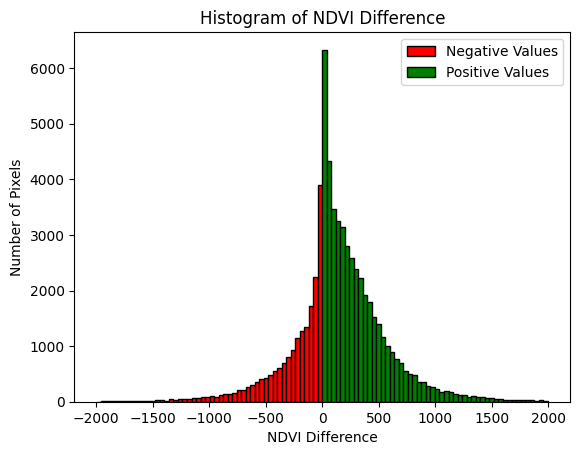

In [28]:

import matplotlib.pyplot as plt


# Separate the data into positive and negative values
negative_data = clean_data[clean_data< 0]
positive_data = clean_data[clean_data >= 0]

# Plot the histogram for negative values
plt.hist(negative_data, bins=50, color='red', edgecolor='black', label='Negative Values')

# Plot the histogram for positive values
plt.hist(positive_data, bins=50, color='green', edgecolor='black', label='Positive Values')

plt.title('Histogram of NDVI Difference')
plt.xlabel('NDVI Difference')
plt.ylabel('Number of Pixels')
plt.legend()
plt.show()


# Clustering


### Filtering

In [29]:
# Separate the data into positive and negative values
# Filtering

positive_samples = sample.filter(ee.Filter.gt('NDVI', 0))
negative_samples = sample.filter(ee.Filter.lt('NDVI', 0))
zero_diff_samples = sample.filter(ee.Filter.eq('NDVI', 0))

positive_nr = positive_samples.size().getInfo()
negative_nr = negative_samples.size().getInfo()
zero_diff_nr = zero_diff_samples.size().getInfo()
print(f'positive samples: {positive_nr}')
print(f'negative samples: {negative_nr}')
print(f'zero diff samples: {zero_diff_nr}')
print(f'total samples: {positive_nr + negative_nr + zero_diff_nr}')

positive samples: 46548
negative samples: 19406
zero diff samples: 6
total samples: 65960


### Adding coordinates as features

In [30]:
# testing
# Check the properties of the first feature in positive_samples
first_positive_sample = positive_samples.first()
print(first_positive_sample.getInfo()['properties'])

# Check the properties of the first feature in negative_samples
first_negative_sample = negative_samples.first()
print(first_negative_sample.getInfo()['properties'])

# need to add coordinates to the sample features
def add_coordinates(feature):
    return feature.set('longitude', feature.geometry().coordinates().get(0)) \
                  .set('latitude', feature.geometry().coordinates().get(1))

# Map the function over the sample
positive_samples_with_coordinates = positive_samples.map(add_coordinates)
negative_samples_with_coordinates = negative_samples.map(add_coordinates)

# Testing again
first_positive_sample = positive_samples_with_coordinates.first()
print(first_positive_sample.getInfo()['properties'])
first_negative_sample = negative_samples_with_coordinates.first()
print(first_negative_sample.getInfo()['properties'])



{'NDVI': 254.20833333333348}
{'NDVI': -37.374999999999545}
{'NDVI': 254.20833333333348, 'latitude': -46.25892916119886, 'longitude': -68.63121776392138}
{'NDVI': -37.374999999999545, 'latitude': 45.617693606693955, 'longitude': 71.28187575207517}


In [31]:
# Clustering
# Clusters of NDVI difference values


# Define the number of clusters
n_clusters = 5

positive_clusterer = ee.Clusterer.wekaKMeans(n_clusters).train(positive_samples)
negative_clusterer = ee.Clusterer.wekaKMeans(n_clusters).train(negative_samples)





# Filtering
#### Let's create a filter for the quality of the Picture.


In [32]:
#Available qualities
available_Qualities = [0,1,2,3]
bad_quality = 2

#choose what quality is too bad to keep
available_Usefulness = [0,1,2,4,8,9,10,12,13,14,15]

#choose what quality is too bad to keep
bad_usefulness = 13


#filter to keep only pixels with a certain image quality or better
def mask_bad_data(image):
    getIndex = available_Usefulness.index(bad_usefulness)
    maskSize = ee.Number(1).add(5).subtract(2)
    maskCur = ee.Number(1).leftShift(maskSize).subtract(1)
    mask = image.select('DetailedQA').rightShift(2).bitwiseAnd(maskCur).eq(available_Usefulness[0])
    for i in range(1,getIndex):
        # Use the QA band to mask "bad" data points
        mask2 = image.select('DetailedQA').rightShift(2).bitwiseAnd(maskCur).eq(available_Usefulness[i])
        mask = mask.Or(mask2)

    maskSize = ee.Number(1).add(1).subtract(0)
    maskCur = ee.Number(1).leftShift(maskSize).subtract(1)
    mask3 = image.select('DetailedQA').rightShift(0).bitwiseAnd(maskCur).eq(available_Qualities[0])
    for i in range(1,bad_quality):
        # Use the QA band to mask "bad" data points
        mask2 = image.select('DetailedQA').rightShift(2).bitwiseAnd(maskCur).eq(available_Qualities[i])
        mask3 = mask3.Or(mask2)

    mask = mask.And(mask3)
    
    return image.updateMask(mask)

#show all the pixels that were deleted due to bad quality in previous filter
def show_bad_data(image):
    getIndex = available_Usefulness.index(bad_usefulness)
    maskSize = ee.Number(1).add(5).subtract(2)
    maskCur = ee.Number(1).leftShift(maskSize).subtract(1)
    mask = image.select('DetailedQA').rightShift(2).bitwiseAnd(maskCur).eq(available_Usefulness[getIndex])
    if getIndex + 1 < len(available_Usefulness):
        for i in range(getIndex+1,len(available_Usefulness)):
            # Use the QA band to mask "bad" data points
            mask2 = image.select('DetailedQA').rightShift(2).bitwiseAnd(maskCur).eq(available_Usefulness[i])
            mask = mask.Or(mask2)

    maskSize = ee.Number(1).add(1).subtract(0)
    maskCur = ee.Number(1).leftShift(maskSize).subtract(1)
    mask3 = image.select('DetailedQA').rightShift(0).bitwiseAnd(maskCur).eq(available_Qualities[bad_quality])
    if bad_quality + 1 < len(available_Qualities):
        for i in range(bad_quality+1,len(available_Qualities)):
            # Use the QA band to mask "bad" data points
            mask2 = image.select('DetailedQA').rightShift(2).bitwiseAnd(maskCur).eq(available_Qualities[i])
            mask3 = mask3.Or(mask2)
        
    mask4 = mask.Not().And(mask3)
    mask5 = mask.And(mask3.Not())
    mask = mask.And(mask3)
    mask = mask.Or(mask4).Or(mask5)
    
    return image.updateMask(mask)

#### First we show all the pixels that were removed due to the bad quality

In [33]:
#test filter on one image
#first let's show the removed pixels
testImage = ee.ImageCollection('MODIS/061/MOD13A2').filterDate(ee.Date('2019-06-01'), ee.Date('2019-06-12')).select(['NDVI','DetailedQA'])
removedPixel = testImage.map(show_bad_data).first()

test_image_count = pixel_count(testImage.first(), global_aoi)
print(f'test image count: {test_image_count:.1e}')

bad_pixel_count = pixel_count(removedPixel, global_aoi)

print(f'bad pixel count with function: {bad_pixel_count:.1e}')
vis_params = {
    'min': -3000,
    'max': 3000,
    'palette': [
         'ce7e45', 'df923d', 'f1b555', 'fcd163', '99b718', '74a901',
        '66a000', '529400', '3e8601', '207401', '056201', '004c00', '023b01',
        '012e01', '011d01', '011301'
    ],
}

# Create a map and add the NDVI layer
Map = geemap.Map()
Map.centerObject(AOI, 2)  # Center the map to our area of interest and set zoom level
Map.addLayer(removedPixel.select('NDVI'), vis_params, 'Mean Filtered')
Map.addLayerControl()  # This will add a layer control to toggle layers
Map.add_colorbar(vis_params, label="NDVI")
Map

test image count: 1.3e+08
bad pixel count with function: 1.5e+07


Map(center=[4.075891298132545e-31, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=…

#### Now we show all the pixels that were kept. (As you can see it has the white areas were we removed the pixels)

In [34]:
#now let's see the filtered image
filtered_ndvi = testImage.map(mask_bad_data)

filtered_ndvi_count = pixel_count(filtered_ndvi.first(), global_aoi)
print(f'filtered ndvi count: {filtered_ndvi_count:.1e}')

vis_params = {
    'min': -3000,
    'max': 3000,
    'palette': [
        'ce7e45', 'df923d', 'f1b555', 'fcd163', '99b718', '74a901',
        '66a000', '529400', '3e8601', '207401', '056201', '004c00', '023b01',
        '012e01', '011d01', '011301'
    ],
}

# Create a map and add the NDVI layer
Map = geemap.Map()
Map.centerObject(AOI, 2)  # Center the map to our area of interest and set zoom level
Map.addLayer(filtered_ndvi.select('NDVI'), vis_params, 'Mean Filtered')
Map.addLayerControl()  # This will add a layer control to toggle layers
Map.add_colorbar(vis_params, label="NDVI")
Map

filtered ndvi count: 1.1e+08


Map(center=[4.075891298132545e-31, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=…

#### Now lets do our 20 year test without the bad pixel

In [35]:

dates_2000_2003 = [('2000-06-01', '2000-08-31'), ('2001-06-01', '2001-08-31'), 
                   ('2002-06-01', '2002-08-31'), ('2003-06-01', '2003-08-31')]

dates_2019_2022 = [('2019-06-01', '2019-08-31'), ('2020-06-01', '2020-08-31'), 
                   ('2021-06-01', '2021-08-31'), ('2022-06-01', '2022-08-31')]


def fetch_avg_NDVI_Filtered(dates):
    filtered_list = []
    for start, end in dates:
        print(f'Fetching data for {start} to {end}')

        # Fetch the MODIS NDVI dataset for a given date range
        MODIS_NDVI = ee.ImageCollection('MODIS/061/MOD13A2').filterDate(ee.Date(start), ee.Date(end)).select(['NDVI','DetailedQA'])

        filtered_ndvi = MODIS_NDVI.map(mask_bad_data)
        
        # Calculate the mean NDVI for the date range
        mean_Filter = filtered_ndvi.mean()
       
        # Add the image to the list
        filtered_list.append(mean_Filter)

    # Combine the list into an image collection
    print(f'\nlength of image_list: {len(filtered_list)}')
    combined_filtered = ee.ImageCollection(filtered_list)

    return combined_filtered.mean()

avg_Filter_2000_2003 = fetch_avg_NDVI_Filtered(dates_2000_2003)
avg_Filter_2019_2022 = fetch_avg_NDVI_Filtered(dates_2019_2022)

Filter_difference = avg_Filter_2019_2022.subtract(avg_Filter_2000_2003)

count_filtered_difference = pixel_count(Filter_difference, global_aoi)
print(f'filtered difference count with function: {count_filtered_difference:.1e}')

# Define visualization parameters
vis_params = {
   
    'min': -3000,
    'max': 3000,
    'palette': ['darkred', 'red', 'lightcoral', 'white', 'lightgreen', 'green', 'darkgreen']


}


# Create a map and add the NDVI layer
Map = geemap.Map()
Map.centerObject(AOI, 2)  # Center the map to our area of interest and set zoom level
Map.addLayer(Filter_difference.select('NDVI'), vis_params, 'Mean Filtered')
Map.addLayerControl()  # This will add a layer control to toggle layers
Map.add_colorbar(vis_params, label="NDVI")
Map

Fetching data for 2000-06-01 to 2000-08-31
Fetching data for 2001-06-01 to 2001-08-31
Fetching data for 2002-06-01 to 2002-08-31
Fetching data for 2003-06-01 to 2003-08-31

length of image_list: 4
Fetching data for 2019-06-01 to 2019-08-31
Fetching data for 2020-06-01 to 2020-08-31
Fetching data for 2021-06-01 to 2021-08-31
Fetching data for 2022-06-01 to 2022-08-31

length of image_list: 4
filtered difference count with function: 1.8e+08


Map(center=[4.075891298132545e-31, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=…